In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import k_means
from sklearn.metrics import silhouette_score

In [2]:
# membaca file csv studentVle.csv
studentvle = pd.read_csv("studentVle.csv")

In [3]:
# menampilkan deskripsi setiap fitur beserta tipe datanya
studentvle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [9]:
# menampilkan ukuran dan jumlah data
studentvle.shape

(10655280, 6)

# Exploratory Data Analysis

In [4]:
#melihat 5 data paling atas
studentvle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [5]:
# melihat 5 data paling bawah
studentvle.tail()

,code_module,code_presentation,id_student,id_site,date,sum_click
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1
10655279,GGG,2014J,654064,896939,269,1


In [6]:
# mengecek dan menghitung data yang kosong
studentvle.isna().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [7]:
# melakukan cek dan menghitung jumlah duplikasi data atau data yang sama
studentvle.duplicated().sum()

787170

# Distribusi Kode Modul

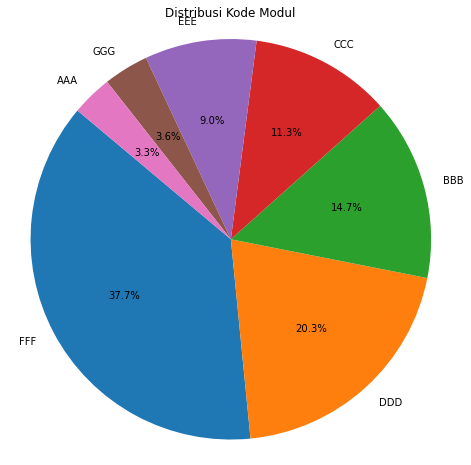

In [8]:
# Menghitung jumlah kategori yang unik
category_counts = studentvle['code_module'].value_counts()

# Menyiapkan data untuk pie chart
labels = category_counts.index
sizes = category_counts.values

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Kode Modul')
plt.axis('equal')  # Memastikan lingkaran tetap berbentuk lingkaran

plt.show()

# Code Module VS Code Presentation

<AxesSubplot:ylabel='code_module'>

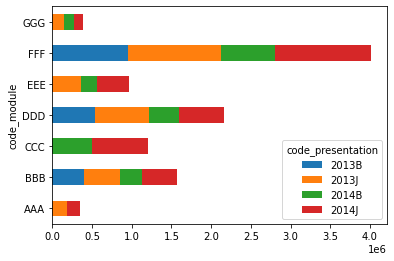

In [17]:
pd.crosstab(studentvle.code_module, studentvle.code_presentation).plot.barh(stacked = True)

In [15]:
# melakukan drop data dari variabel 'date' yang nilainya dibawah 0
studentVleDrop = studentvle[studentvle['date'] >= 0]
studentVleDrop.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
10847,AAA,2013J,345357,546667,0,3
10848,AAA,2013J,345357,546883,0,1
10849,AAA,2013J,345357,546732,0,14
10850,AAA,2013J,345357,546614,0,5
10851,AAA,2013J,345357,546876,0,1
